In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


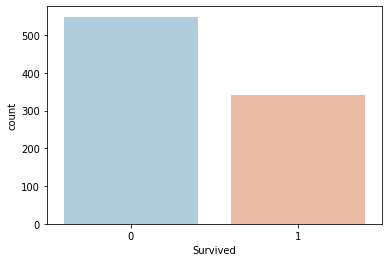

In [4]:
sns.countplot(x = 'Survived', data= data , palette='RdBu_r')

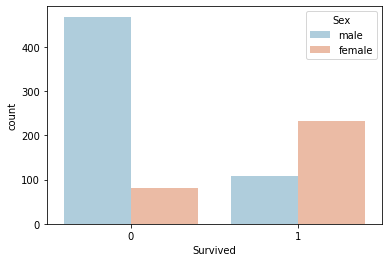

In [5]:
sns.countplot(x = 'Survived', hue='Sex', data= data , palette='RdBu_r')

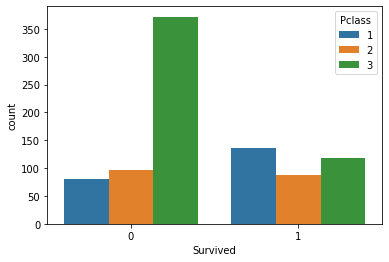

In [6]:
sns.countplot(x = 'Survived',hue = 'Pclass', data= data )

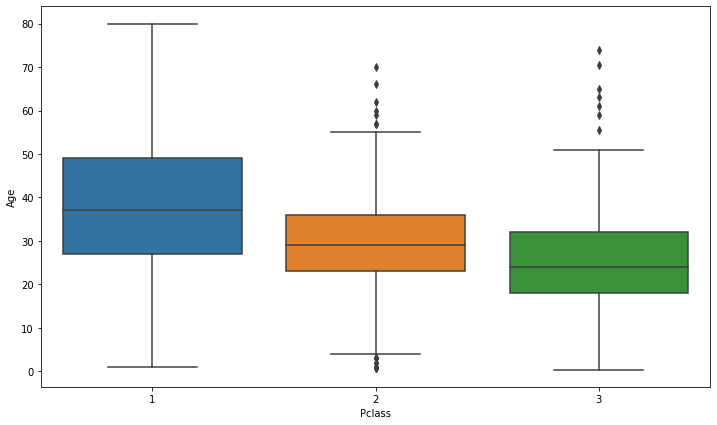

In [7]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', data = data, y = 'Age')

In [8]:
data[['Age', "Pclass"]]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [9]:
def fill_Age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else :
            return 24
    else:
        return age

In [10]:
data['Age'] = data[['Age', 'Pclass']].apply(fill_Age, axis=1)

In [11]:
data['Age'].isnull().sum()

0

In [12]:
data['Cabin'].isnull().sum()

687

In [13]:
def impute_cabin(columns):
    Cabin = columns[0]
    if type(Cabin) == 'str':
        return 1
    else:
        return 0


In [14]:
data['Cabin'] = data[['Cabin']].apply(impute_cabin, axis = 1)

In [15]:
data['Cabin'].isnull().sum()

0

In [16]:
dataset = data

sex = pd.get_dummies(dataset['Sex'],drop_first = True)
Embark = pd.get_dummies(dataset['Embarked'],drop_first = True)
dataset.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis =1, inplace =True)
dataset = pd.concat([dataset, sex, Embark], axis = 1)

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('Survived', axis = 1), dataset['Survived'], test_size = 0.25, random_state = 101)

In [3]:
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)
pred = regressor.predict(X_test)

NameError: name 'X_train' is not defined

In [20]:
print(accuracy_score(Y_test, pred))

0.7668161434977578


In [21]:
import xgboost as xgb

In [22]:
xgbModel = xgb.XGBClassifier()
xgbModel.fit(X_train, Y_train)
print(xgbModel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [24]:
xgbPred = xgbModel.predict(X_test)

In [25]:
print(accuracy_score(Y_test, xgbPred))

0.8116591928251121
